<a href="https://colab.research.google.com/github/humaira1996/Colab/blob/main/Prediction_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Stock Market Prediction And Forecasting Using Stacked LSTM

In [ ]:
### Keras and Tensorflow >2.0

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir("/content/drive/My Drive")
!ls

Mounted at /content/drive
'1075 (1).docx'			   'Intern- Agreement_Humaira_Afia.gdoc'
'2. CV_ Humaira.pdf'		   'Intern- Agreement_Humaira_Afia.pdf'
'CamScanner 01-21-2024 13.35.pdf'   Letter.gdoc
 Classroom			    NVDA.csv
'Colab Notebooks'		   'PMSCS600distribution_Form (1).pdf'
'cv rough.gsheet'		    PMSCS600distribution_Form.pdf
 Dog				   'Resume (1).gdoc'
'Humaira_Afia_CV (1).pdf'	    Resume.gdoc
'Humaira_Afia_CV (2).pdf'	    Screenshot_2016-07-21-15-16-44-365.jpeg
'HumairaAfiaCV (2).pdf'		    Screenshot_2016-11-05-23-55-50-719.jpeg
 HumairaAfiaCV_bjit.gdoc	   'Screenshot (21).png'
 HumairaAfiaCV_bjit.pdf		    Signature_Bangladesh_Bank.jpg
 Humaira_Afia_CV.pdf		    StockPrice.ipynb
 IMG_20160102_0007_converted.jpg    SUPLIMENTARY_2021127978_pdf.pdf
 IMG_20160102_0009.jpg		   'Thesis Report'
 IMG_20191115_004730_399.jpg	    Untitled.ipynb
 IMG-20210110-WA0006.jpg	   'Untitled spreadsheet.gsheet'


In [2]:
import pandas as pd
df = pd.read_csv('NVDA.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,0.984375,0.992188,0.919271,0.975260,0.894608,30091200
1,2000-01-04,0.958333,0.960938,0.901042,0.949219,0.870721,30048000
2,2000-01-05,0.921875,0.937500,0.904948,0.917969,0.842055,18835200
3,2000-01-06,0.917969,0.917969,0.822917,0.858073,0.787112,12048000
4,2000-01-07,0.854167,0.881510,0.841146,0.872396,0.800251,7118400
...,...,...,...,...,...,...,...
6111,2024-04-18,849.700012,861.900024,824.020020,846.710022,846.710022,44726000
6112,2024-04-19,831.500000,843.239990,756.059998,762.000000,762.000000,87190500
6113,2024-04-22,781.039978,800.729980,764.000000,795.179993,795.179993,59634100
6114,2024-04-23,807.690002,827.690002,802.640015,824.229980,824.229980,43855900


In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,0.984375,0.992188,0.919271,0.975260,0.894608,30091200
1,2000-01-04,0.958333,0.960938,0.901042,0.949219,0.870721,30048000
2,2000-01-05,0.921875,0.937500,0.904948,0.917969,0.842055,18835200
3,2000-01-06,0.917969,0.917969,0.822917,0.858073,0.787112,12048000
4,2000-01-07,0.854167,0.881510,0.841146,0.872396,0.800251,7118400


In [4]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
6111,2024-04-18,849.700012,861.900024,824.020020,846.710022,846.710022,44726000
6112,2024-04-19,831.500000,843.239990,756.059998,762.000000,762.000000,87190500
6113,2024-04-22,781.039978,800.729980,764.000000,795.179993,795.179993,59634100
6114,2024-04-23,807.690002,827.690002,802.640015,824.229980,824.229980,43855900
6115,2024-04-24,839.500000,840.820007,791.830017,796.770020,796.770020,50961600


In [5]:
df1=df.reset_index()['Close']

In [6]:
df1

0         0.975260
1         0.949219
2         0.917969
3         0.858073
4         0.872396
           ...    
6111    846.710022
6112    762.000000
6113    795.179993
6114    824.229980
6115    796.770020
Name: Close, Length: 6116, dtype: float64

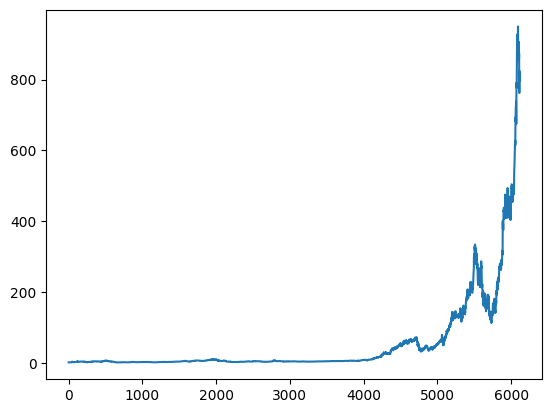

In [7]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [8]:
import numpy as np

In [9]:
df1

0         0.975260
1         0.949219
2         0.917969
3         0.858073
4         0.872396
           ...    
6111    846.710022
6112    762.000000
6113    795.179993
6114    824.229980
6115    796.770020
Name: Close, Length: 6116, dtype: float64

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [11]:
print(df1)

[[3.80335764e-04]
 [3.52907030e-04]
 [3.19991707e-04]
 ...
 [8.36908498e-01]
 [8.67506568e-01]
 [8.38583258e-01]]


In [12]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [13]:
training_size,test_size

(3975, 2141)

In [14]:
train_data

array([[0.00038034],
       [0.00035291],
       [0.00031999],
       ...,
       [0.00668927],
       [0.0066761 ],
       [0.00666557]])

In [15]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [16]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [17]:
print(X_train.shape), print(y_train.shape)

(3874, 100)
(3874,)


(None, None)

In [18]:
print(X_test.shape), print(ytest.shape)

(2040, 100)
(2040,)


(None, None)

In [19]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [20]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [21]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
61/61 [==============================] - 20s 243ms/step - loss: 2.4466e-05 - val_loss: 0.0516
Epoch 2/100
61/61 [==============================] - 13s 219ms/step - loss: 2.6640e-06 - val_loss: 0.0450
Epoch 3/100
61/61 [==============================] - 13s 222ms/step - loss: 2.1296e-06 - val_loss: 0.0296
Epoch 4/100
61/61 [==============================] - 13s 220ms/step - loss: 1.0414e-06 - val_loss: 0.0056
Epoch 5/100
61/61 [==============================] - 13s 206ms/step - loss: 2.6785e-07 - val_loss: 0.0049
Epoch 6/100
61/61 [==============================] - 13s 216ms/step - loss: 3.0637e-07 - val_loss: 0.0052
Epoch 7/100
61/61 [==============================] - 13s 210ms/step - loss: 2.7488e-07 - val_loss: 0.0047
Epoch 8/100
61/61 [==============================] - 13s 221ms/step - loss: 2.5523e-07 - val_loss: 0.0042
Epoch 9/100
61/61 [==============================] - 13s 222ms/step - loss: 2.2194e-07 - val_loss: 0.0044
Epoch 10/100
61/61 [==========================

In [24]:
import tensorflow as tf

In [28]:
tf.__version__

'2.15.0'

In [25]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

64/64 [==============================] - 2s 38ms/step


In [26]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [27]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

3.8705766127366807

In [28]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

178.83678398746738

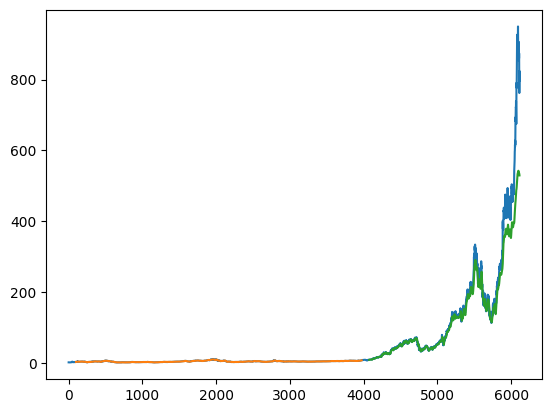

In [29]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [31]:
len(test_data)

2141

In [33]:
x_input=test_data[2041:].reshape(1,-1)
x_input.shape


(1, 100)

In [34]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [35]:
temp_input

[0.4919770017470073,
 0.4919243182715032,
 0.4787055373251422,
 0.4898282810565314,
 0.4786317996293203,
 0.4901442544614268,
 0.49972920379710356,
 0.4904707723557714,
 0.5013196816683201,
 0.505859360864926,
 0.5086189762514556,
 0.5143067376897664,
 0.5268092885877752,
 0.5218272464136577,
 0.5061015965739996,
 0.5153600280153317,
 0.5136747571746852,
 0.5184040528555705,
 0.5198575977180119,
 0.5209635399203716,
 0.5209635399203716,
 0.5067019804858944,
 0.500392780915371,
 0.5049114058916592,
 0.516487056036719,
 0.5497289282036898,
 0.5590716081250027,
 0.5718163957853754,
 0.5767878955766242,
 0.5756082156784427,
 0.5932192625738951,
 0.5897539605751724,
 0.6008556174342439,
 0.6259660229838502,
 0.6276828914809733,
 0.629989599400542,
 0.6456731081475647,
 0.6483589858382723,
 0.6421867203298144,
 0.6572909309839697,
 0.6605455622780956,
 0.6474110635170056,
 0.6632104184004856,
 0.696209957955673,
 0.7296203597346054,
 0.7179393415852471,
 0.737699078625756,
 0.732874991028731

In [36]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.5521083]
101
1 day input [0.49192432 0.47870554 0.48982828 0.4786318  0.49014425 0.4997292
 0.49047077 0.50131968 0.50585936 0.50861898 0.51430674 0.52680929
 0.52182725 0.5061016  0.51536003 0.51367476 0.51840405 0.5198576
 0.52096354 0.52096354 0.50670198 0.50039278 0.50491141 0.51648706
 0.54972893 0.55907161 0.5718164  0.5767879  0.57560822 0.59321926
 0.58975396 0.60085562 0.62596602 0.62768289 0.6299896  0.64567311
 0.64835899 0.64218672 0.65729093 0.66054556 0.64741106 0.66321042
 0.69620996 0.72962036 0.71793934 0.73769908 0.73287499 0.75912303
 0.76033428 0.75907038 0.77773465 0.76465281 0.76417881 0.73088432
 0.71002912 0.82658626 0.82952492 0.83242147 0.82830313 0.81736997
 0.83263214 0.86598983 0.89714617 0.90480362 0.93362162 0.97542672
 0.92127709 0.90280234 0.96746385 0.95666762 0.92565875 0.92453172
 0.93104105 0.94097357 0.95123261 0.96242909 0.99249003 1.
 0.97428915 0.94994762 0.95106411 0.95113785 0.94154239 0.93640232
 0.90418215 0.92633287 0.91711658 0.89837851

In [37]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [38]:
import matplotlib.pyplot as plt

In [39]:
len(df1)

6116

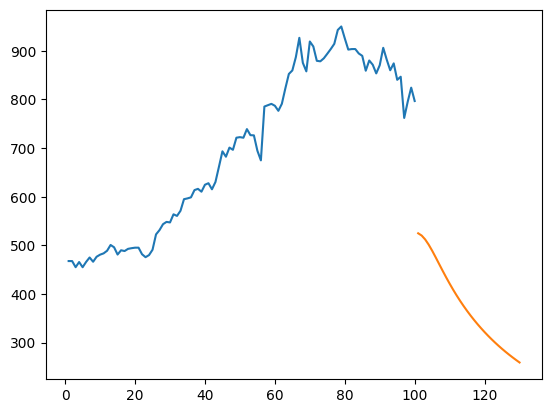

In [40]:
plt.plot(day_new,scaler.inverse_transform(df1[6016:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

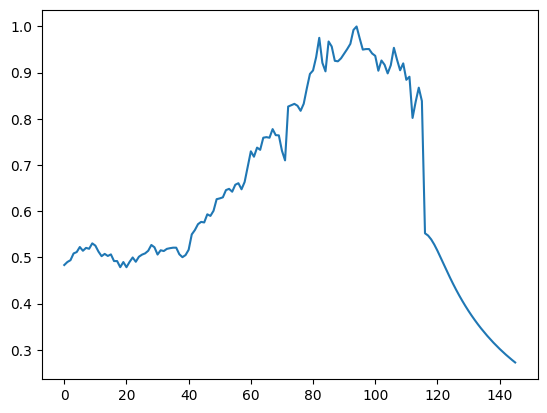

In [44]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[6000:])

In [45]:
df3=scaler.inverse_transform(df3).tolist()

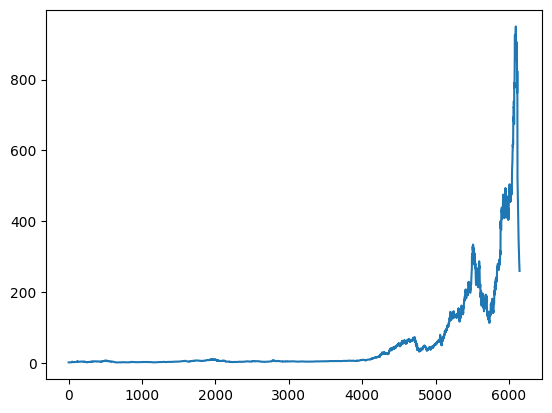

In [46]:
plt.plot(df3)